# Load Data


In [2]:
import pandas as pd

fake_df = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true_df = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

fake_df.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Add label column and Combine data

In [3]:
fake_df['label'] = 'FAKE'
true_df['label'] = 'REAL'
df = pd.concat([fake_df, true_df], ignore_index=True)
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


In [5]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=42)


In [6]:
df.head()

,title,text,subject,date,label
22216,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",FAKE
27917,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",REAL
25007,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",REAL
1377,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",FAKE
32476,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",REAL


In [7]:
df['label'].value_counts()

label
FAKE    23481
REAL    21417
Name: count, dtype: int64

# Process Text

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)


In [9]:
df['clean_text'].head()

22216    st century wire say ben stein reputable profes...
27917    washington reuters u president donald trump re...
25007    reuters puerto rico governor ricardo rossello ...
1377     monday donald trump embarrassed country accide...
32476    glasgow scotland reuters u presidential candid...
Name: clean_text, dtype: object

# Vectorize text using TF-IDF


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label'].map({'FAKE': 0, 'REAL': 1})  # Convert labels to binary


# Train a logistic Regression classifier

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,ConfusionMatrixDisplay

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
lr = LogisticRegression()
model=lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)




In [12]:
# Evaluate
acc=accuracy_score(y_test, y_pred)
print(f"Accuracy for logistic regression model is :{acc}" )
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy for logistic regression model is :0.9848552338530067
F1 Score: 0.9841454884588483


# visulaize confusion Matrix


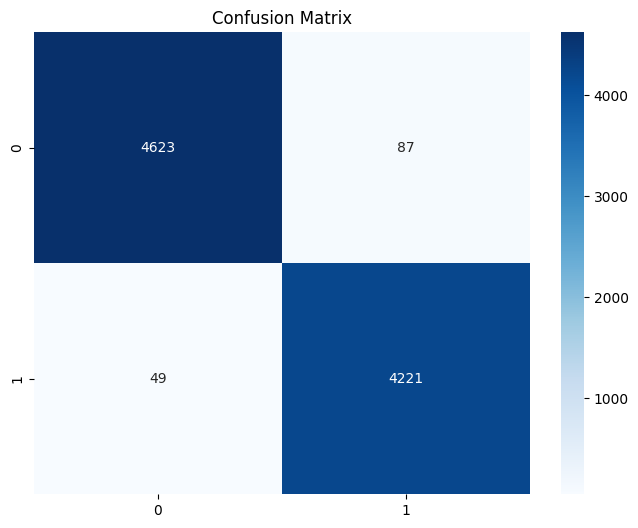

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Visualize common terms using Word Cloud

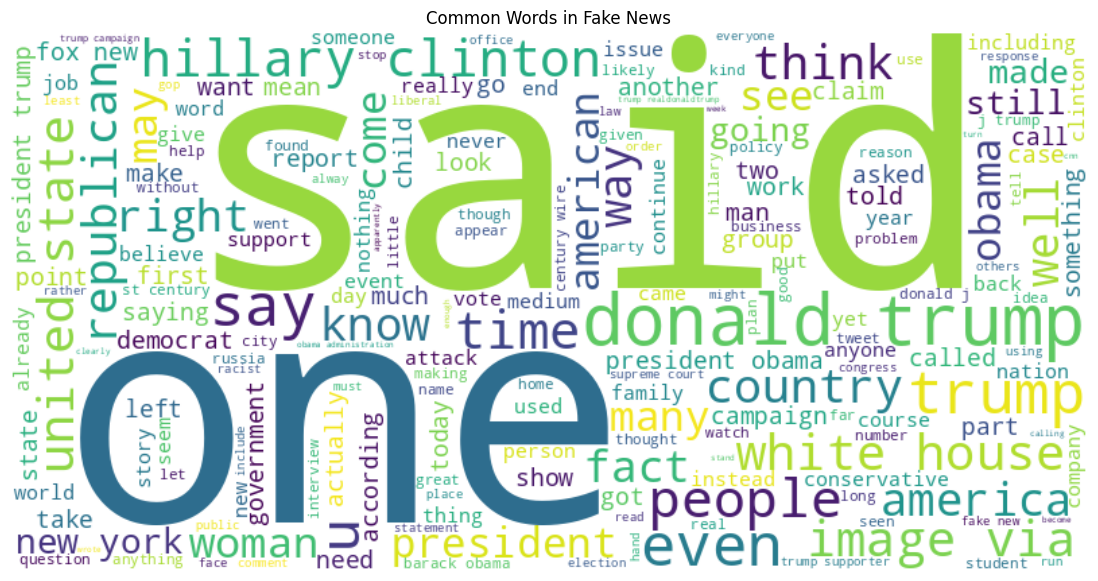

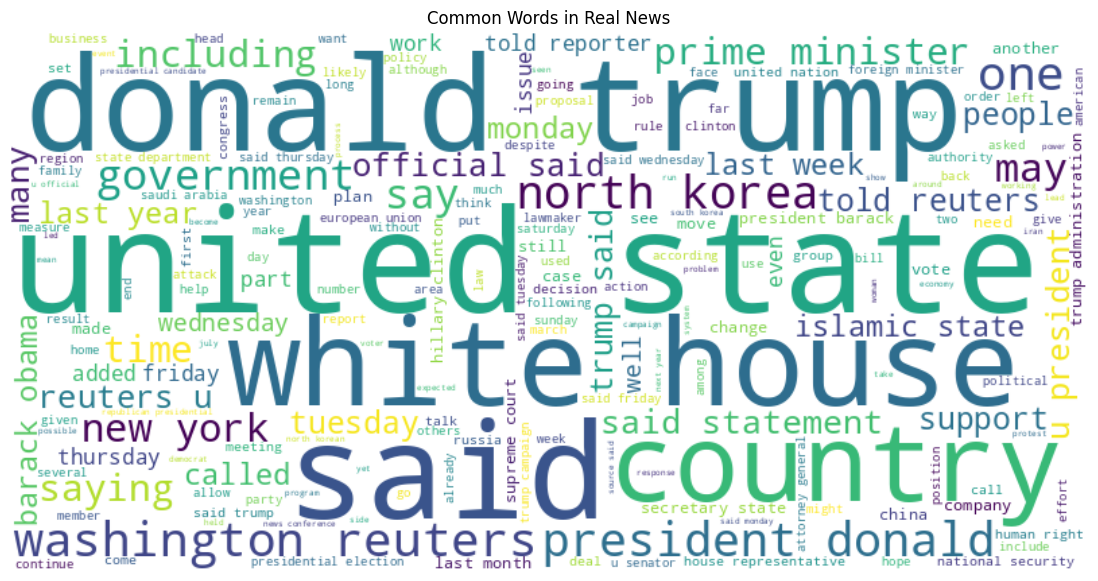

In [15]:
from wordcloud import WordCloud

# Separate fake and real news
fake_text = " ".join(df[df['label']=='FAKE']['clean_text'])
real_text = " ".join(df[df['label']=='REAL']['clean_text'])

# WordCloud for Fake News
fake_wc = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(15,7))
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Fake News")
plt.show()

# WordCloud for Real News
real_wc = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(15,7))
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Real News")
plt.show()
